In [19]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib


import rtmtools.lblrtm.aerutils as aerutils
importlib.reload(aerutils)
import rtmtools.clirad.sw.wrangle as cliradwrangle
importlib.reload(cliradwrangle)
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
importlib.reload(rrtmgwrangle)

import climatools.offline_scripts.intermodel as scripts_intermodel
importlib.reload(scripts_intermodel)


<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [2]:
name_molecule = 'O3' #r'$H_{2}O$'

In [3]:
#### Load CRD results

In [4]:
# Get lbl line-by-line results
pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples', 
                           'lbl_H2008_{name_molecule}_cut25'\
                           .format(name_molecule=name_molecule),
                           'OUTPUT_RADSUM')

#pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_h2O_cut25/OUTPUT_RADSUM'

pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
                                                cooling_rate=True, 
                                                signed_fluxes=True)

print(pathout_crd)

/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_O3_cut25/OUTPUT_RADSUM


In [5]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = os.path.join('/nuwa_cluster/home/jackyu',
                            'radiation/crd/LW/examples',
                            'lbl_H1996_{name_molecule}_cut10'\
                            .format(name_molecule=name_molecule),
                            'OUTPUT_RADSUM')

pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd1, 
                                                 cooling_rate=True, 
                                                 signed_fluxes=True)

print(pathout_crd1)

/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H1996_O3_cut10/OUTPUT_RADSUM


In [6]:
#### Load CLIRAD results

In [7]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/LW/examples',
                              'mls75_{name_molecule}_H2012'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_CLIRAD.dat')

pnl_clirad = cliradwrangle.\
             OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad,
                                          cooling_rate=True, 
                                          signed_fluxes=True)

In [8]:
pathout_clirad_96 = os.path.join('/nuwa_cluster/home/jackyu',
                                 'radiation/clirad/LW/examples',
                                 'mls75_{name_molecule}'\
                                 .format(name_molecule=name_molecule),
                                 'OUTPUT_CLIRAD.dat')

pnl_clirad_96 = cliradwrangle.\
                OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad_96, 
                                             cooling_rate=True,
                                             signed_fluxes=True)

In [9]:
#### Load LBLRTM results

In [10]:
# Get AER line-by-line results
pathout_lblrtm = os.path.join('/nuwa_cluster/home/jackyu',
                              'line_by_line/aerlbl_v12.2_package',
                              'runs/LW/run_mls75pro_{name_molecule}'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_RADSUM')

pnl_lblrtm = aerutils.\
             OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_lblrtm, 
                                          signed_fluxes=True, 
                                          cooling_rate=True)

In [11]:
#### Load RRTMG results

In [12]:
pathout_rrtmg = os.path.join('/nuwa_cluster/home/jackyu',
                             'radiation/rrtmg/LW/examples',
                             'mls70_{name_molecule}'\
                             .format(name_molecule=name_molecule),
                             'OUTPUT_RRTM')

pnl_rrtmg = rrtmgwrangle.\
            OUTPUT_RRTM_to_pandasPanel(readfrom=pathout_rrtmg,
                                       signed_fluxes=True,
                                       cooling_rate = True)

# Whole spectral range

CRD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -415.383897   0.000000 -415.383897      0.000000
30   299.800000 -421.720705   2.063563 -419.657142     -0.059957
0   1013.000000 -423.662018   4.378191 -419.283827      0.026399

LBLRTM
     pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.0024 -412.208759   0.000000 -412.208759      0.000000
30   299.8000 -421.352791   3.336097 -418.016694     -0.065692
0   1013.0000 -423.532488   5.966166 -417.566322      0.000920

RRTMG
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -412.7006     0.0000 -412.7006       0.00000
30   299.70000 -421.4352     3.0272 -418.4080      -0.06896
0   1013.00000 -423.5988     5.7209 -417.8779       0.03329

CLIRAD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -414.967698   0.000010 -414.967688     -0.107618
30   299.800000 -421.809958   2.173651 -419.636307     -0.057569
0   1013.000000 -423.78618

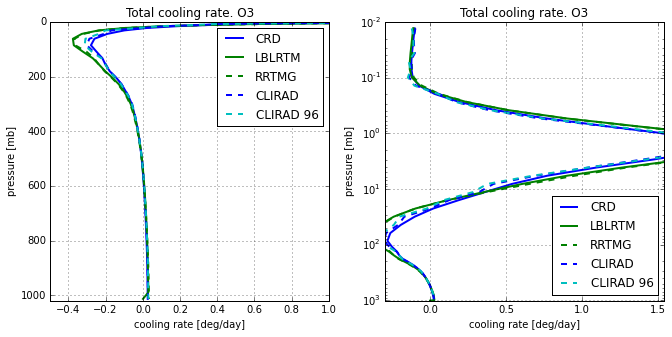

In [20]:
scripts_intermodel.lw_results_all_wavenumbers(
    infos_wavenumber=[('CRD', 'b', '-', pnl_crd),
                      ('LBLRTM', 'g', '-', pnl_lblrtm),
                      ('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_spectralband=[('CLIRAD', 'b', '--', pnl_clirad),
                        ('CLIRAD 96', 'c', '--', pnl_clirad_96)],
    name_molecule=name_molecule)

In [15]:
html_download = ('<a href="./longwave_mls_{name_molecule}_total.xlsx"'
                 'download>longwave_mls_{name_molecule}_total.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In RRTMG's wavenumber bands

Flux tables and cooling rates in RRTMG spectral bands


RRTMG-LW. Spectral band 1. 10.0 ~ 350.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -54.5825          0  -54.5825            -0
30   299.70000 -54.5825          0  -54.5825            -0
0   1013.00000 -54.5825          0  -54.5825            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -54.573788  0.000000e+00 -54.573788  0.000000e+00
30   299.800000 -54.573788  2.819921e-07 -54.573787  1.311528e-09
0   1013.000000 -54.573788  5.670697e-07 -54.573787  3.837701e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -54.630229   0.000000 -54.630229      0.000000
30   299.8000 -54.660391   0.080099 -54.580292      0.000198
0   1013.0000 -54.581667   0.095058 -54.486609      0.028816

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003 -0.008712  0.000000e+00 -0.008712 -0.000000e+00


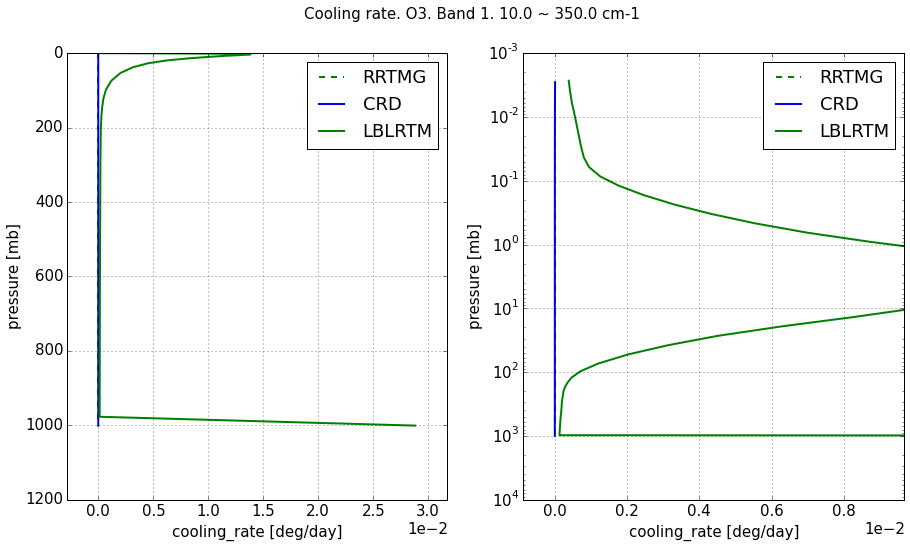


------------------------------------------------------------------------

RRTMG-LW. Spectral band 2. 350.0 ~ 500.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -60.9174          0  -60.9174            -0
30   299.70000 -60.9174          0  -60.9174            -0
0   1013.00000 -60.9174          0  -60.9174            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -60.916637  0.000000e+00 -60.916637  0.000000e+00
30   299.800000 -60.916638  2.644419e-07 -60.916637  5.833640e-10
0   1013.000000 -60.916638  5.671926e-07 -60.916637  4.275775e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.928586   0.000000 -60.928586  0.000000e+00
30   299.8000 -60.928885   0.000391 -60.928495  5.338283e-07
0   1013.0000 -60.917465   0.000504 -60.916961  4.063699e-03

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003 -0.000763  0.000000e+00 -0.0

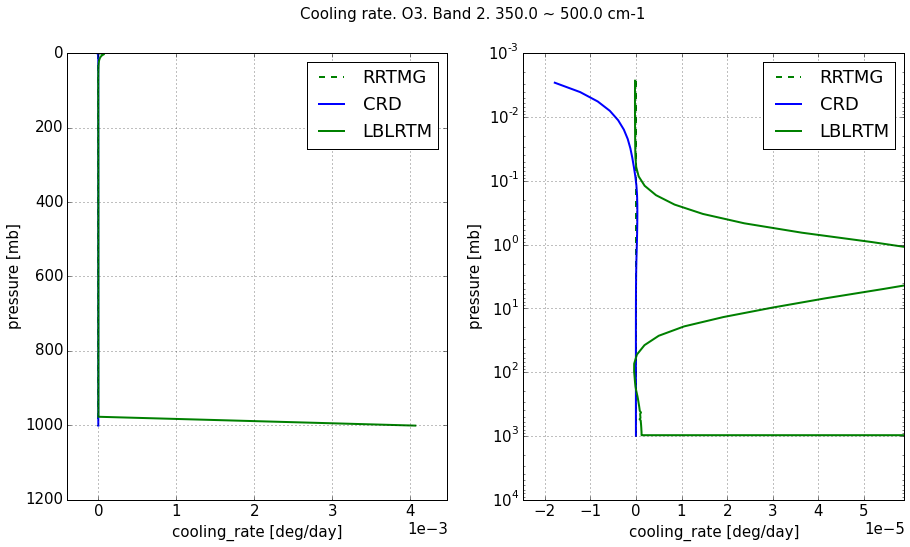


------------------------------------------------------------------------

RRTMG-LW. Spectral band 3. 500.0 ~ 630.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -58.6466          0  -58.6466            -0
30   299.70000 -58.6466          0  -58.6466            -0
0   1013.00000 -58.6466          0  -58.6466            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -58.652387  0.000000e+00 -58.652387  0.000000e+00
30   299.800000 -58.652387  2.203418e-07 -58.652386 -5.988993e-11
0   1013.000000 -58.652387  5.000336e-07 -58.652386  4.110279e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -58.607044   0.000000 -58.607044      0.000000
30   299.8000 -58.634682   0.019092 -58.615591     -0.000013
0   1013.0000 -58.646623   0.024863 -58.621760     -0.003475

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.005787  0.000000e+00  0.0

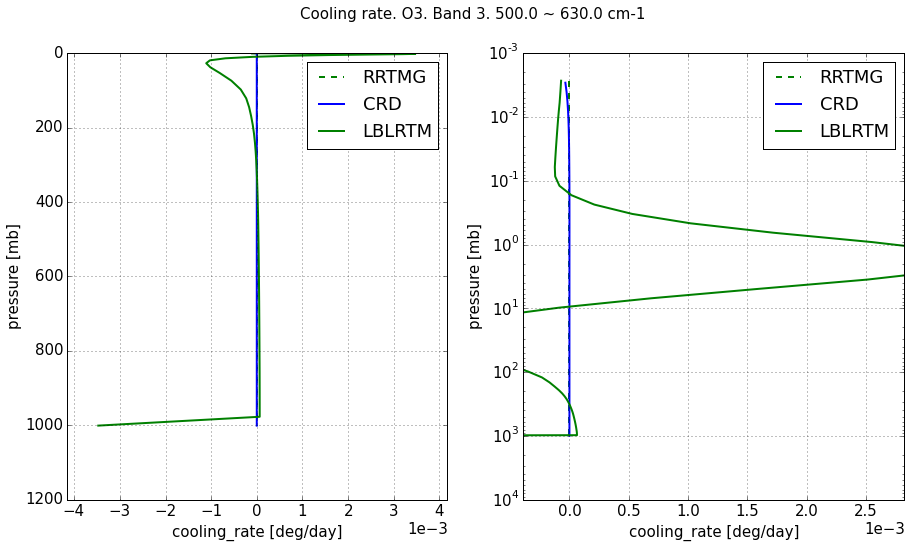


------------------------------------------------------------------------

RRTMG-LW. Spectral band 4. 630.0 ~ 700.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -30.3159     0.0000  -30.3159            -0
30   299.70000 -30.8956     0.3455  -30.5501            -0
0   1013.00000 -30.8956     0.3455  -30.5501            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.901144  0.000000e+00 -30.901144  0.000000e+00
30   299.800000 -30.901144  1.041794e-07 -30.901144 -2.530970e-10
0   1013.000000 -30.901144  2.470559e-07 -30.901144  2.162866e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -29.977814   0.000000 -29.977814      0.000000
30   299.8000 -30.832188   0.488407 -30.343781     -0.000893
0   1013.0000 -30.895458   0.605721 -30.289736     -0.002771

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.585244     0.0000  0.585244 

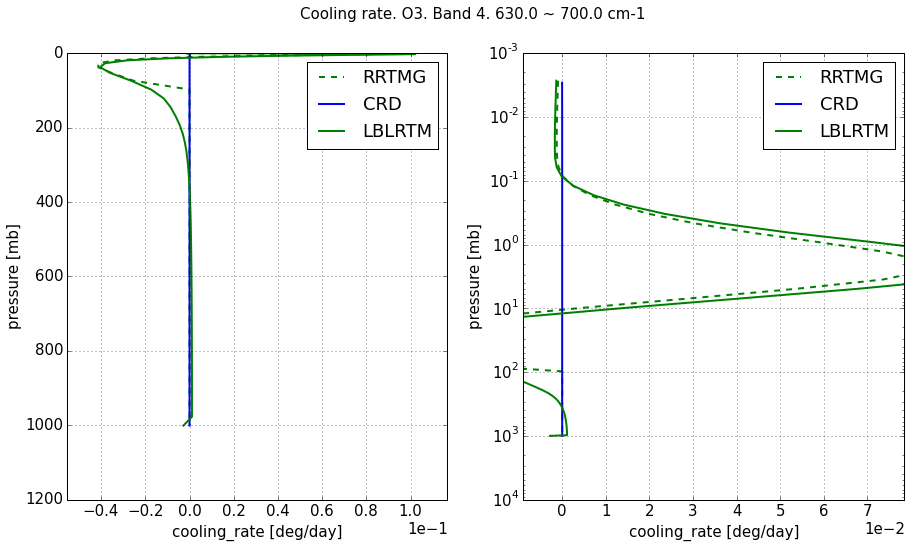


------------------------------------------------------------------------

RRTMG-LW. Spectral band 5. 700.0 ~ 820.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -47.6750     0.0000  -47.6750      -0.00000
30   299.70000 -48.8203     0.5217  -48.2986      -0.00133
0   1013.00000 -48.8871     0.6604  -48.2267       0.00135

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -48.899846  0.000000e+00 -48.899846  0.000000e+00
30   299.800000 -48.899846  1.488874e-07 -48.899845 -7.042967e-10
0   1013.000000 -48.899846  3.684535e-07 -48.899845  3.418567e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -47.703364   0.000000 -47.703364      0.000000
30   299.8000 -48.795771   0.549176 -48.246595     -0.001471
0   1013.0000 -48.886744   0.695462 -48.191282     -0.005819

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  1.224846     0.0000  1.224846 

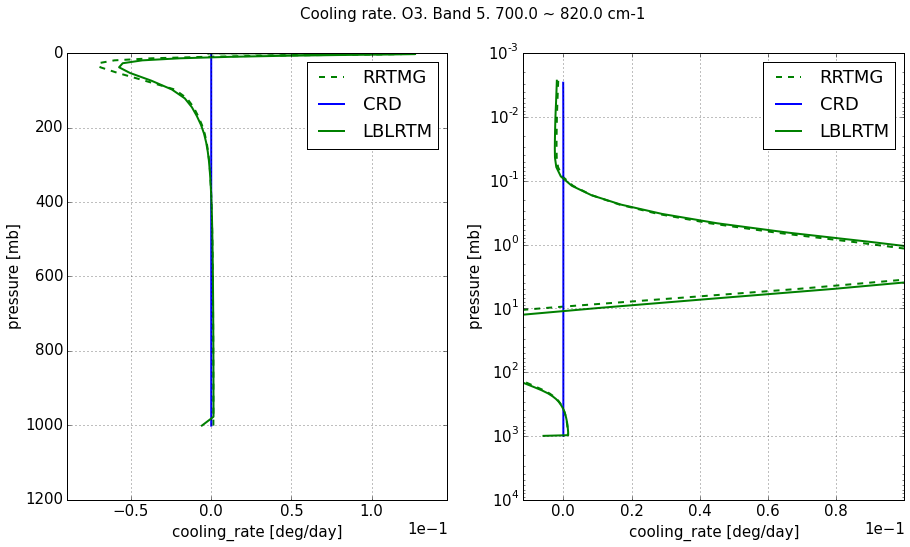


------------------------------------------------------------------------

RRTMG-LW. Spectral band 6. 820.0 ~ 980.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -53.9607          0  -53.9607            -0
30   299.70000 -53.9607          0  -53.9607            -0
0   1013.00000 -53.9607          0  -53.9607            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -53.981633  0.000000e+00 -53.981633  0.000000e+00
30   299.800000 -53.981634  1.416120e-07 -53.981634 -1.219487e-09
0   1013.000000 -53.981634  3.738202e-07 -53.981634  3.767053e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -53.906150   0.000000 -53.906150      0.000000
30   299.8000 -53.933699   0.011429 -53.922270     -0.000057
0   1013.0000 -53.960338   0.020409 -53.939929     -0.007977

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.020933  0.000000e+00  0.0

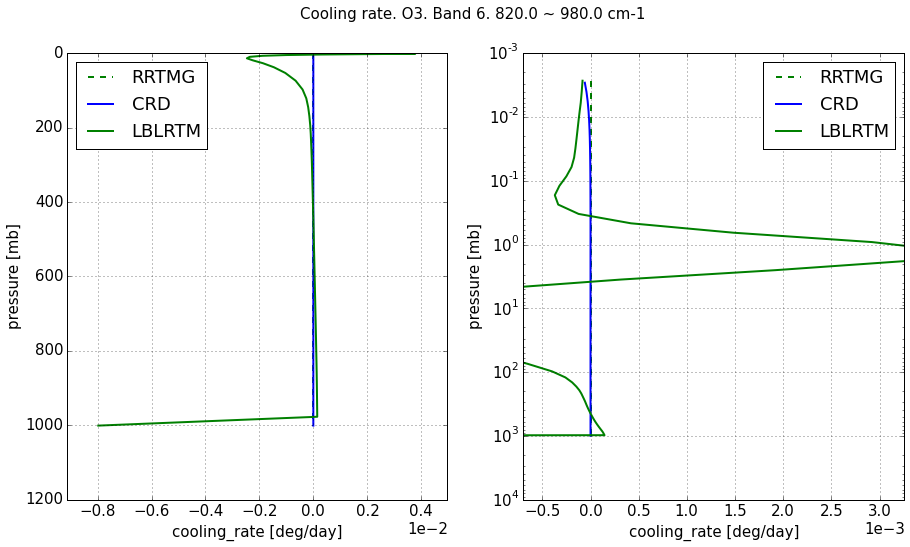


------------------------------------------------------------------------

RRTMG-LW. Spectral band 7. 980.0 ~ 1080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -18.3205     0.0000  -18.3205      -0.00000
30   299.70000 -24.6755     2.0180  -22.6575      -0.06534
0   1013.00000 -26.6401     4.4076  -22.2325       0.02820

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -18.542117   0.000000 -18.542117      0.000000
30   299.800000 -24.723457   2.022201 -22.701256     -0.059611
0   1013.000000 -26.654056   4.321516 -22.332540      0.026223

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -18.354242   0.000000 -18.354242      0.000000
30   299.8000 -24.720024   2.035311 -22.684713     -0.061416
0   1013.0000 -26.640246   4.302499 -22.337746      0.022199

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.221617   0.000000  0.221617     -0.0000

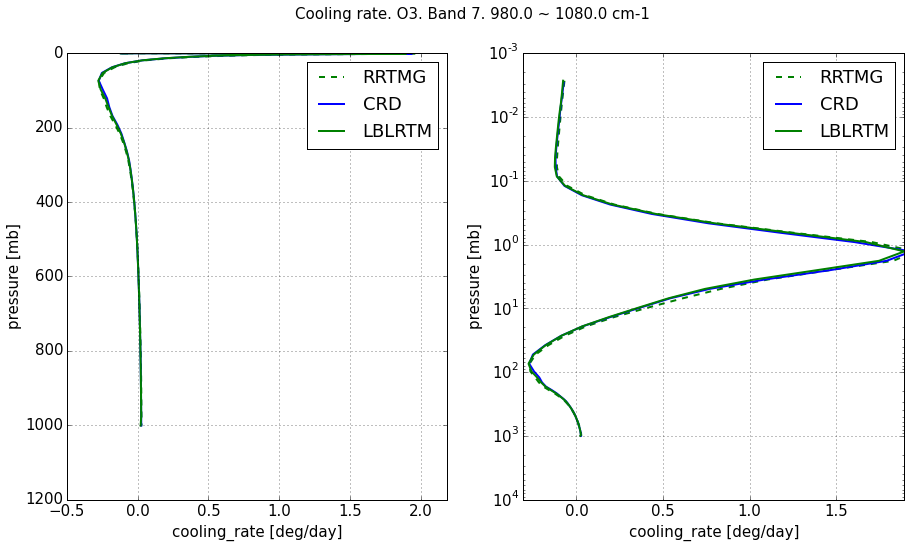


------------------------------------------------------------------------

RRTMG-LW. Spectral band 8. 1080.0 ~ 1180.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -20.9504     0.0000  -20.9504      -0.00000
30   299.70000 -21.4862     0.1338  -21.3524      -0.00119
0   1013.00000 -21.5225     0.1850  -21.3375       0.00059

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -21.369760   0.000000 -21.369760      0.000000
30   299.800000 -21.525225   0.041361 -21.483864     -0.000346
0   1013.000000 -21.535940   0.056672 -21.479268      0.000176

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -20.917206   0.000000 -20.917206      0.000000
30   299.8000 -21.474850   0.137019 -21.337830     -0.001305
0   1013.0000 -21.522739   0.191802 -21.330937     -0.002425

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.419360   0.000000  0.419360     -0.000

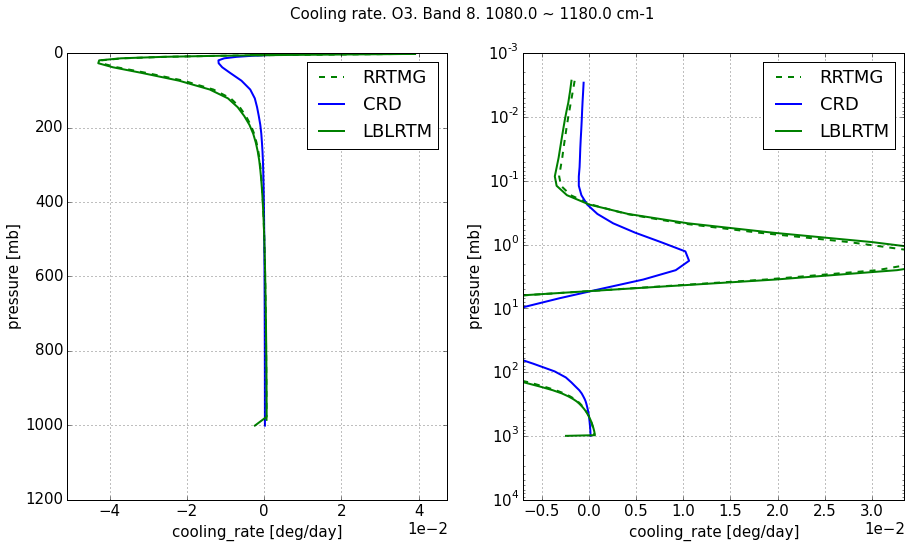


------------------------------------------------------------------------

RRTMG-LW. Spectral band 9. 1180.0 ~ 1390.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -31.2994          0  -31.2994            -0
30   299.70000 -31.2994          0  -31.2994            -0
0   1013.00000 -31.2994          0  -31.2994            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -31.323236  0.000000e+00 -31.323236  0.000000e+00
30   299.800000 -31.323236  5.537980e-08 -31.323236 -1.247450e-09
0   1013.000000 -31.323236  1.756035e-07 -31.323236  2.174742e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -31.267505   0.000000 -31.267505      0.000000
30   299.8000 -31.285929   0.004517 -31.281412     -0.000042
0   1013.0000 -31.299603   0.006876 -31.292726     -0.004272

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.023836  0.000000e+00  0

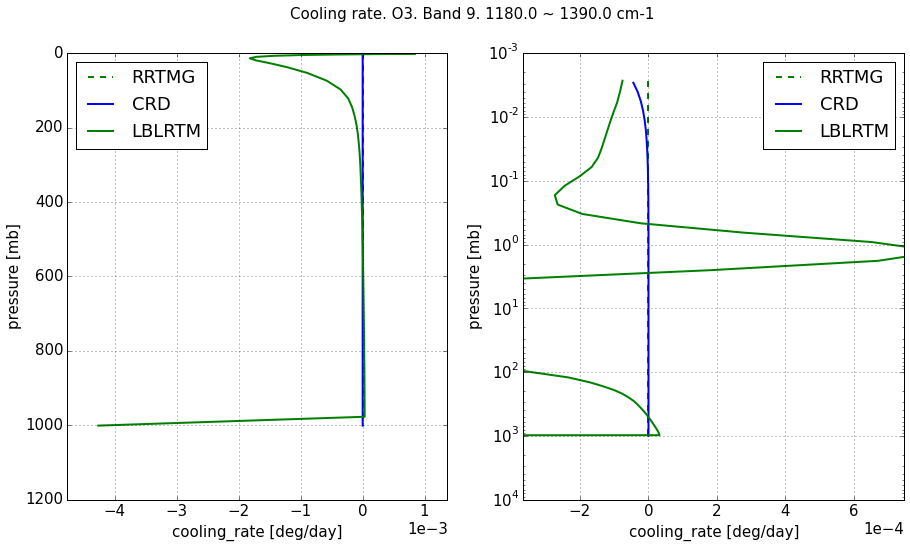


------------------------------------------------------------------------

RRTMG-LW. Spectral band 10. 1390.0 ~ 1480.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -8.8986          0   -8.8986            -0
30   299.70000  -8.8986          0   -8.8986            -0
0   1013.00000  -8.8986          0   -8.8986            -0

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -8.906562  0.000000e+00 -8.906562  0.000000e+00
30   299.800000 -8.906562  1.346605e-08 -8.906562 -4.019412e-10
0   1013.000000 -8.906562  4.614281e-08 -8.906562  6.170478e-10

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -8.893864   0.000000 -8.893864      0.000000
30   299.8000 -8.894650   0.000135 -8.894514     -0.000002
0   1013.0000 -8.898490   0.000210 -8.898279     -0.001340

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.007962  0.000000e+00  0.007962 -0.0000

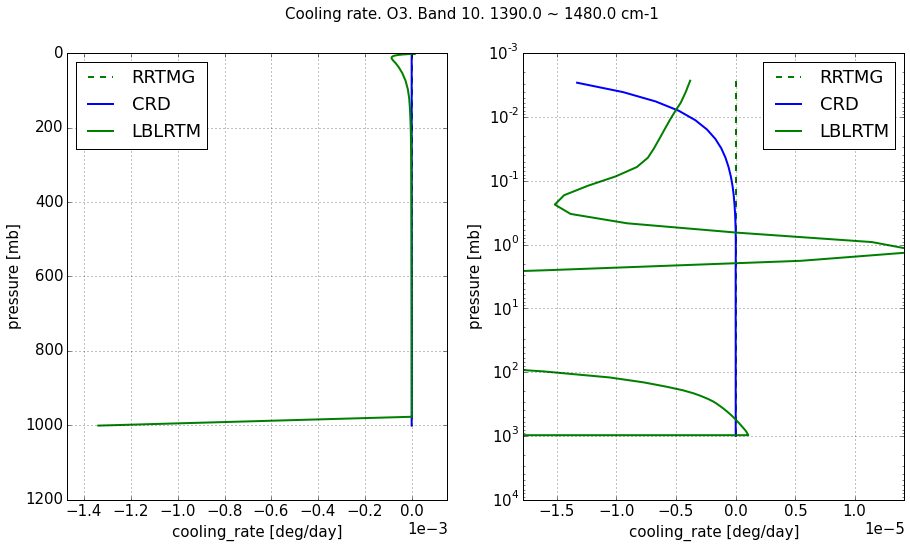


------------------------------------------------------------------------

RRTMG-LW. Spectral band 11. 1480.0 ~ 1800.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -17.8828          0  -17.8828            -0
30   299.70000 -17.8828          0  -17.8828            -0
0   1013.00000 -17.8828          0  -17.8828            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -17.902258  0.000000e+00 -17.902258  0.000000e+00
30   299.800000 -17.902258  2.291789e-08 -17.902258 -8.945306e-10
0   1013.000000 -17.902258  8.544518e-08 -17.902258  1.237200e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -17.838741   0.000000 -17.838741      0.000000
30   299.8000 -17.871812   0.003319 -17.868492     -0.000087
0   1013.0000 -17.882889   0.005211 -17.877677     -0.003128

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.019458  0.000000e+00  

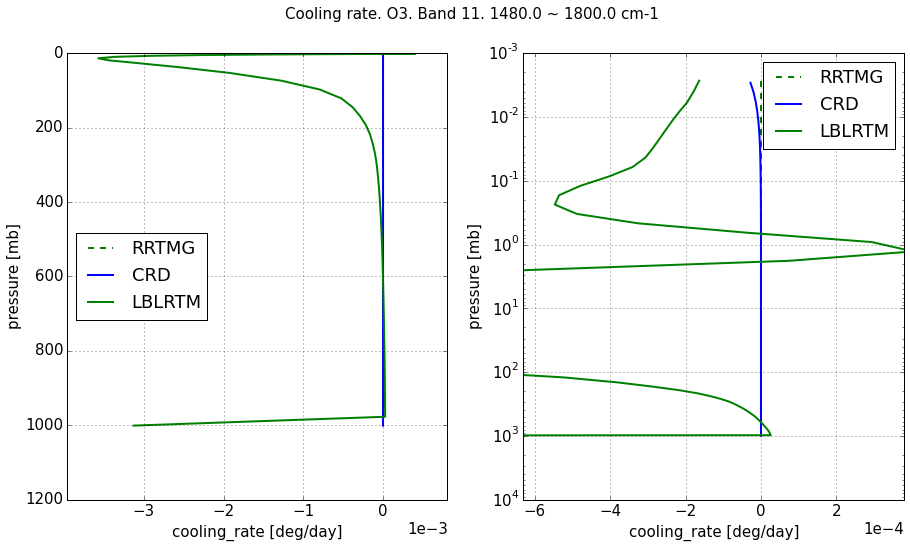


------------------------------------------------------------------------

RRTMG-LW. Spectral band 12. 1800.0 ~ 2080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -5.9578          0   -5.9578            -0
30   299.70000  -5.9578          0   -5.9578            -0
0   1013.00000  -5.9578          0   -5.9578            -0

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -5.965987  0.000000e+00 -5.965987  0.000000e+00
30   299.800000 -5.965987  5.834966e-09 -5.965987 -3.356538e-10
0   1013.000000 -5.965987  2.509201e-08 -5.965987  4.105883e-10

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -5.865690   0.000000 -5.865690      0.000000
30   299.8000 -5.893006   0.001965 -5.891040     -0.000087
0   1013.0000 -5.957771   0.003947 -5.953824     -0.022073

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.008187  0.000000e+00  0.008187 -0.0000

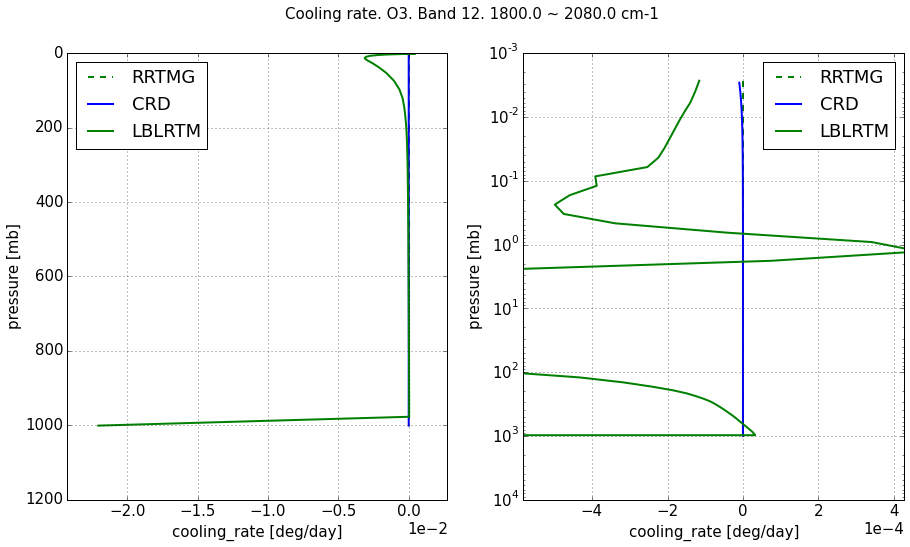


------------------------------------------------------------------------

RRTMG-LW. Spectral band 13. 2080.0 ~ 2250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -1.5417     0.0000   -1.5417            -0
30   299.70000  -1.6390     0.0075   -1.6315            -0
0   1013.00000  -1.6390     0.0076   -1.6314            -0

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -1.641655  0.000000e+00 -1.641655  0.000000e+00
30   299.800000 -1.641655  1.318907e-09 -1.641655 -9.823153e-11
0   1013.000000 -1.641655  6.319246e-09 -1.641655  1.126136e-10

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -1.517403   0.000000 -1.517403      0.000000
30   299.8000 -1.625354   0.005199 -1.620155     -0.000516
0   1013.0000 -1.639014   0.013533 -1.625481     -0.000225

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.099955     0.0000  0.099955 -0.000000e+00

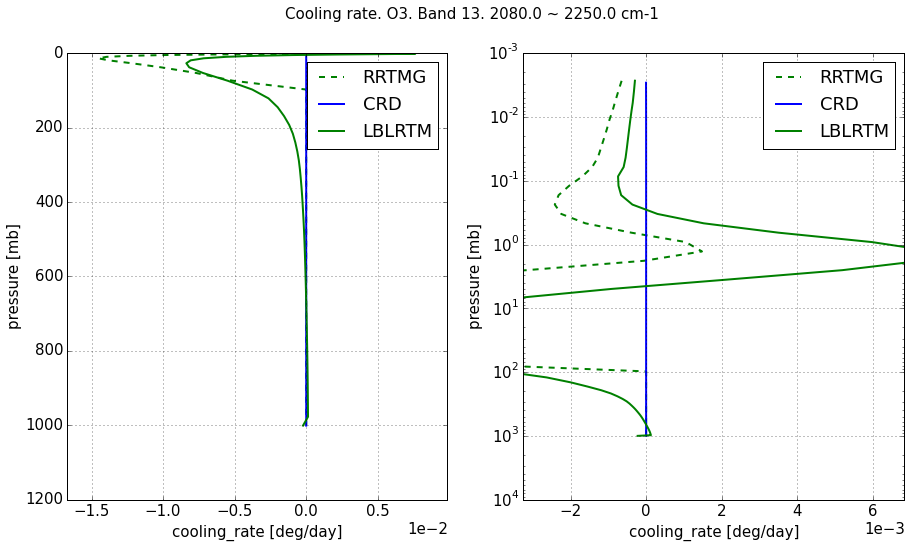


------------------------------------------------------------------------

RRTMG-LW. Spectral band 14. 2250.0 ~ 2380.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.7315          0   -0.7315            -0
30   299.70000  -0.7315          0   -0.7315            -0
0   1013.00000  -0.7316          0   -0.7316            -0

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -0.732844  0.000000e+00 -0.732844  0.000000e+00
30   299.800000 -0.732844  5.224365e-10 -0.732844 -4.517531e-11
0   1013.000000 -0.732844  2.676597e-09 -0.732844  5.016600e-11

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.730956   0.000000 -0.730956  0.000000e+00
30   299.8000 -0.731077   0.000007 -0.731070 -3.775092e-07
0   1013.0000 -0.731556   0.000016 -0.731539 -1.655832e-04

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.001344  0.000000e+00  0.001344 -0.0000

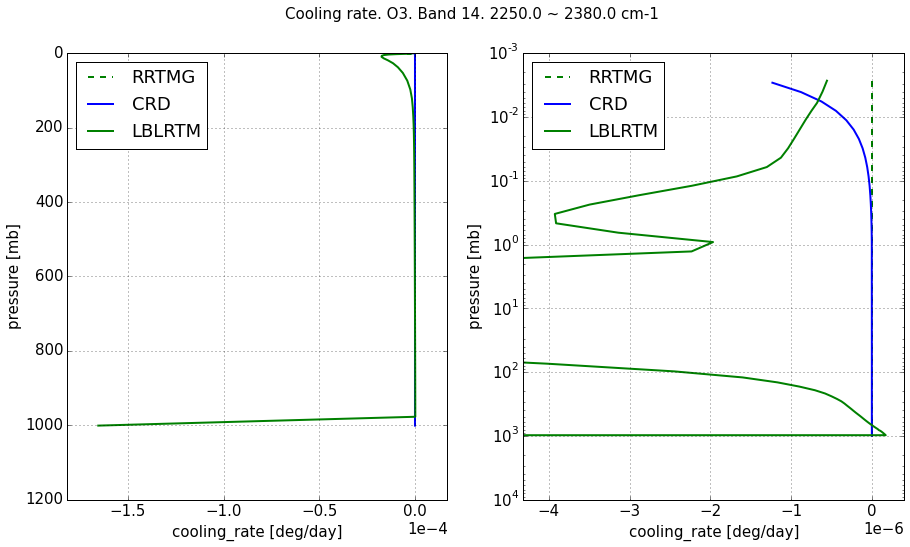


------------------------------------------------------------------------

RRTMG-LW. Spectral band 15. 2380.0 ~ 2600.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.5485     0.0000   -0.5485      -0.00000
30   299.70000  -0.5700     0.0007   -0.5693      -0.00110
0   1013.00000  -0.6658     0.1148   -0.5510       0.00315

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -0.667119  0.000000e+00 -0.667119  0.000000e+00
30   299.800000 -0.667119  4.207911e-10 -0.667119 -4.218625e-11
0   1013.000000 -0.667119  2.310911e-09 -0.667119  4.556381e-11

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.665366   0.000000 -0.665366  0.000000e+00
30   299.8000 -0.665406   0.000002 -0.665404 -1.121754e-07
0   1013.0000 -0.665840   0.000003 -0.665836 -1.530274e-04

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.118619     0.0000  0.118619      -0.00000

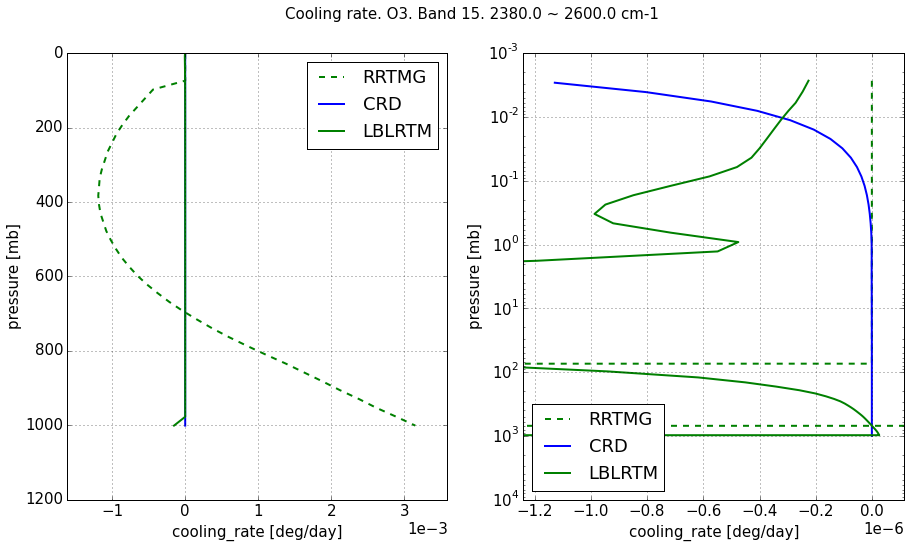


------------------------------------------------------------------------

RRTMG-LW. Spectral band 16. 2600.0 ~ 3250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.4713          0   -0.4713            -0
30   299.70000  -0.4713          0   -0.4713            -0
0   1013.00000  -0.4713          0   -0.4713            -0

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -0.404431  0.000000e+00 -0.404431  0.000000e+00
30   299.800000 -0.404431  2.104346e-10 -0.404431 -2.639985e-11
0   1013.000000 -0.404431  1.291457e-09 -0.404431  2.751858e-11

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.401927   0.000000 -0.401927      0.000000
30   299.8000 -0.402391   0.000013 -0.402378     -0.000001
0   1013.0000 -0.403547   0.000032 -0.403515     -0.000397

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003 -0.066869  0.000000e+00 -0.066869 -0.0000

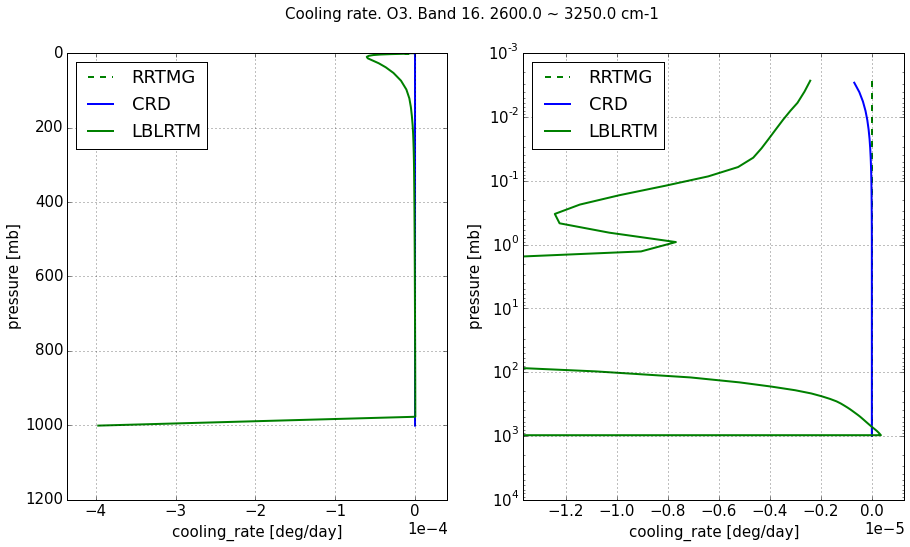


------------------------------------------------------------------------



In [16]:
print('Flux tables and cooling rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.lw_results_by_rrtmg_bands(
    infos_rrtmg=[('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd), 
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [17]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In CLIRAD's wavenumber bands

Flux tables and cooling rates in CLIRAD spectral bands


CLIRAD-LW Spectral band 1. 0 ~ 340 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -51.09212   0.000003 -51.092117 -5.771265e-07
30   299.800000 -51.09212   0.000003 -51.092117  2.273129e-09
0   1013.000000 -51.09213   0.000005 -51.092125  4.439772e-09

CRD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -51.09304  0.000000e+00 -51.093040  0.000000e+00
30   299.800000 -51.09304  2.655836e-07 -51.093040  1.255140e-09
0   1013.000000 -51.09304  5.329452e-07 -51.093039  3.593164e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -51.148164   0.000000 -51.148164      0.000000
30   299.8000 -51.178177   0.079914 -51.098263      0.000198
0   1013.0000 -51.100657   0.094825 -51.005832      0.028385

CLIRAD - CRD
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0  0.00092   0.000003  0.000923 -5.771265e-07
30

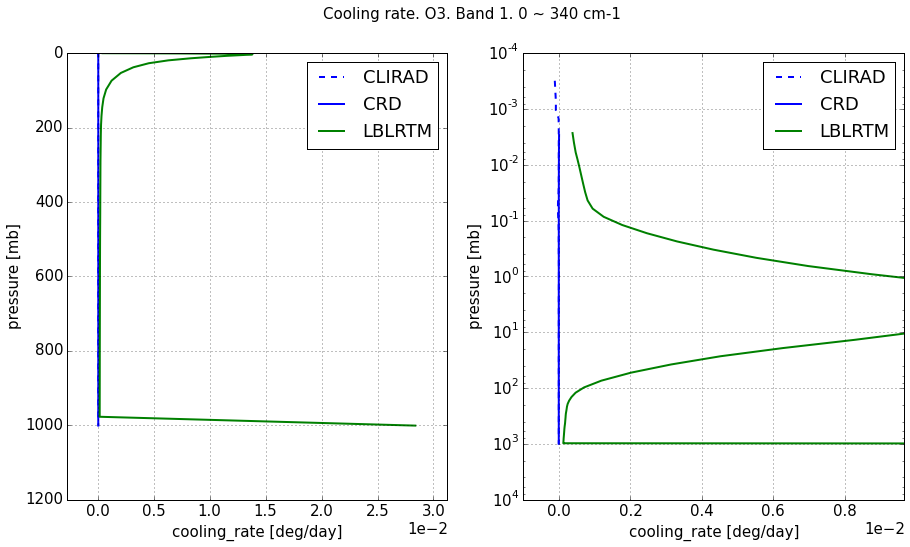


------------------------------------------------------------------------

CLIRAD-LW Spectral band 2. 340 ~ 540 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -82.31579   0.000003 -82.315787 -1.784270e-06
30   299.800000 -82.31579   0.000005 -82.315785  3.727262e-09
0   1013.000000 -82.31579   0.000008 -82.315782  1.023691e-08

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -82.315834  0.000000e+00 -82.315834  0.000000e+00
30   299.800000 -82.315835  3.514494e-07 -82.315834  6.818576e-10
0   1013.000000 -82.315835  7.585482e-07 -82.315834  5.776692e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -82.326400   0.000000 -82.326400  0.000000e+00
30   299.8000 -82.326854   0.000592 -82.326262  8.123909e-07
0   1013.0000 -82.315849   0.000755 -82.315094  3.920285e-03

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.000044   0.000003 

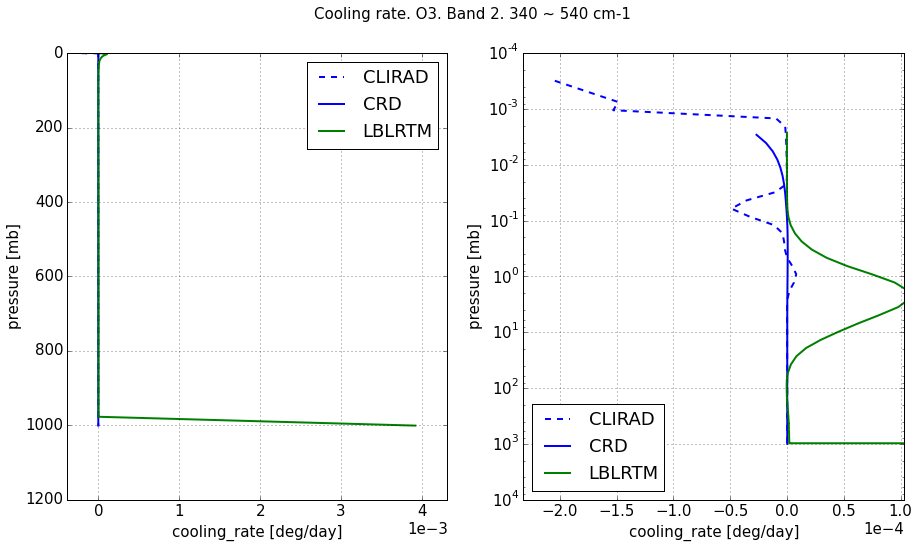


------------------------------------------------------------------------

CLIRAD-LW Spectral band 3. 540 ~ 800 cm-1

CLIRAD
       pressure  flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -112.816   0.000003 -112.815997 -3.838177e-06
30   299.800000 -112.816   0.000005 -112.815995  3.702570e-09
0   1013.000000 -112.816   0.000011 -112.815989  1.932914e-08

CRD
       pressure     flux_up     flux_down    net_flux  cooling_rate
70     0.002417 -112.837813  0.000000e+00 -112.837813  0.000000e+00
30   299.800000 -112.837813  3.806693e-07 -112.837813 -9.236175e-10
0   1013.000000 -112.837813  9.021645e-07 -112.837812  7.897587e-09

LBLRTM
     pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.0024 -110.692149   0.000000 -110.692149      0.000000
30   299.8000 -112.656351   1.051774 -111.604577     -0.002363
0   1013.0000 -112.816764   1.319290 -111.497473     -0.010324

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.02

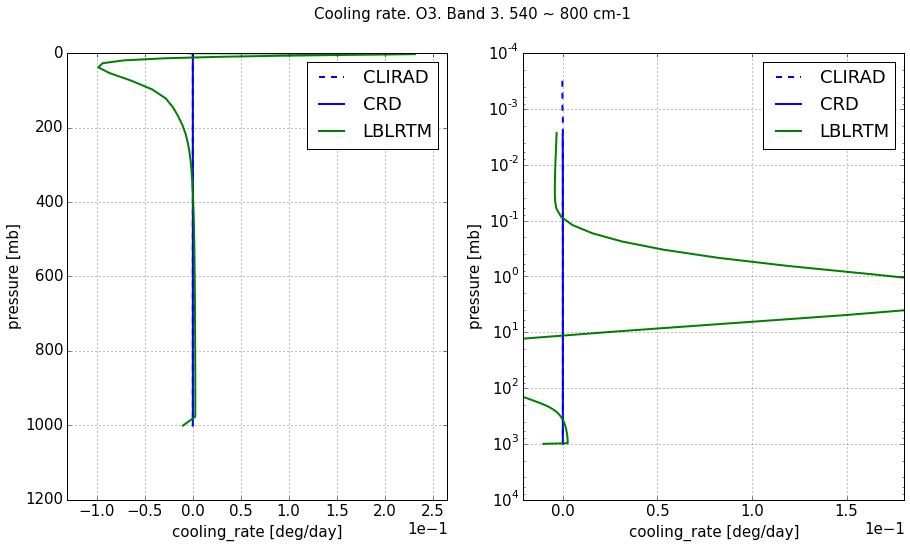


------------------------------------------------------------------------

CLIRAD-LW Spectral band 4. 800 ~ 980 cm-1

CLIRAD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -61.64931  6.214958e-10 -61.64931            -0
30   299.800000 -61.64931  6.214977e-10 -61.64931            -0
0   1013.000000 -61.64931  6.214976e-10 -61.64931            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -61.681242  0.000000e+00 -61.681242  0.000000e+00
30   299.800000 -61.681243  1.637677e-07 -61.681243 -1.355153e-09
0   1013.000000 -61.681243  4.299970e-07 -61.681242  4.304974e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -61.589145   0.000000 -61.589145      0.000000
30   299.8000 -61.626912   0.016330 -61.610582     -0.000070
0   1013.0000 -61.657526   0.027165 -61.630361     -0.009081

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.031932 

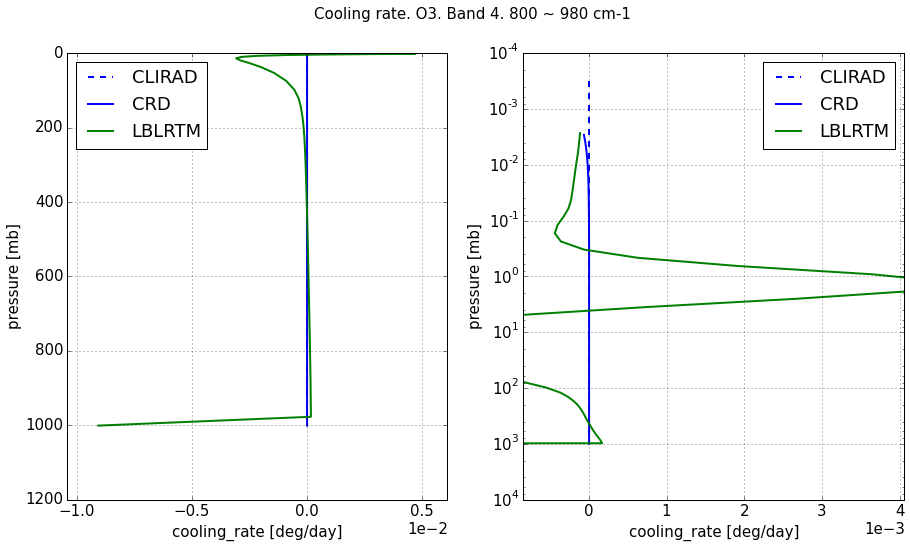


------------------------------------------------------------------------

CLIRAD-LW Spectral band 5. 980 ~ 1100 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -22.52541  4.351434e-07 -22.525410     -0.107610
30   299.800000 -29.36767  2.173637e+00 -27.194033     -0.057569
0   1013.000000 -31.34389  4.638890e+00 -26.705000      0.027917

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -23.076111   0.000000 -23.076111      0.000000
30   299.800000 -29.412917   2.063562 -27.349356     -0.059957
0   1013.000000 -31.354231   4.378188 -26.976043      0.026399

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -22.883789   0.000000 -22.883789      0.000000
30   299.8000 -29.405425   2.076119 -27.329306     -0.061748
0   1013.0000 -31.337711   4.357831 -26.979879      0.021684

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.550701  4.3514

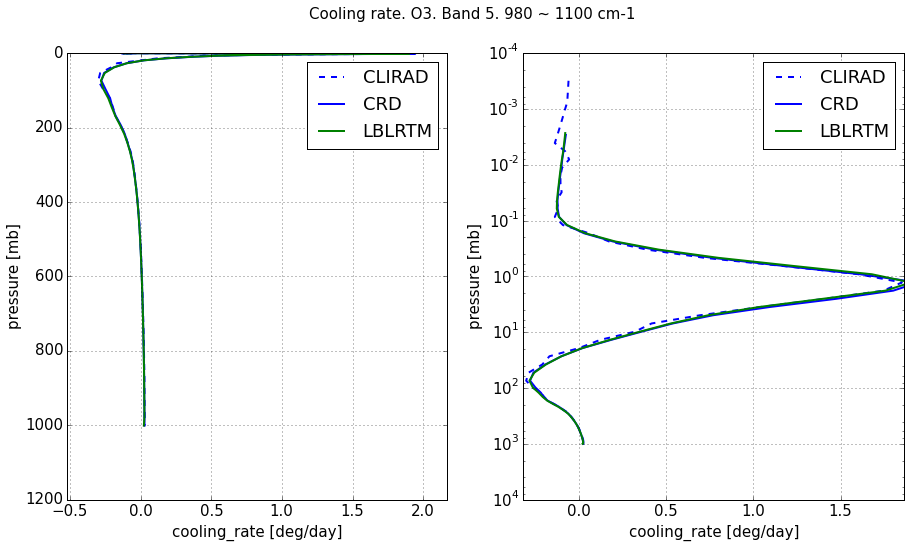


------------------------------------------------------------------------

CLIRAD-LW Spectral band 6. 1100 ~ 1215 cm-1

CLIRAD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -23.27341          0 -23.27341            -0
30   299.800000 -23.27341          0 -23.27341            -0
0   1013.000000 -23.27341          0 -23.27341            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -23.269652  0.000000e+00 -23.269652  0.000000e+00
30   299.800000 -23.269652  4.643548e-08 -23.269652 -8.180951e-10
0   1013.000000 -23.269652  1.389566e-07 -23.269652  1.618239e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -22.796020   0.000000 -22.796020      0.000000
30   299.8000 -23.215059   0.100448 -23.114611     -0.001012
0   1013.0000 -23.254791   0.142869 -23.111922     -0.002761

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.003758  0.000000e

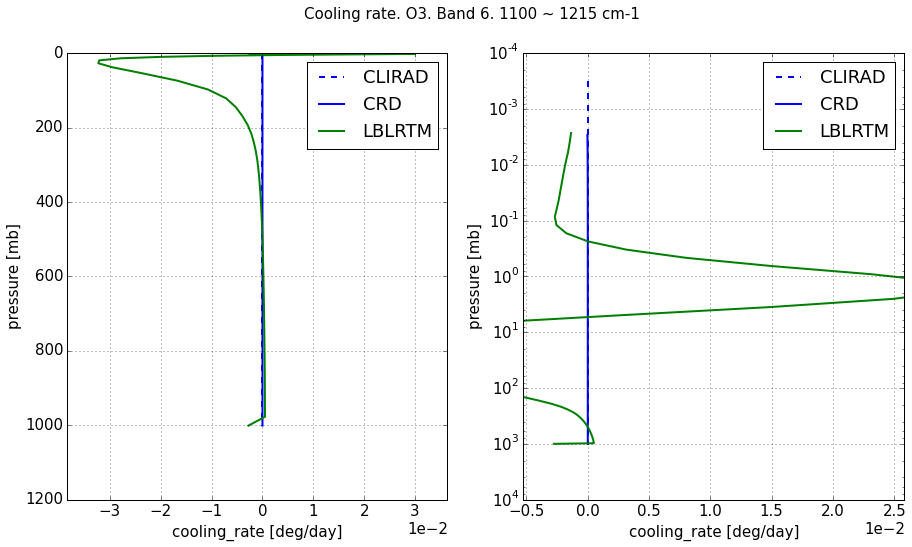


------------------------------------------------------------------------

CLIRAD-LW Spectral band 7. 1215 ~ 1380 cm-1

CLIRAD
       pressure  flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -23.7406  2.289835e-16  -23.7406            -0
30   299.800000 -23.7406  1.887379e-15  -23.7406            -0
0   1013.000000 -23.7406  3.608225e-15  -23.7406            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -23.755165  0.000000e+00 -23.755165  0.000000e+00
30   299.800000 -23.755165  4.129745e-08 -23.755165 -9.604811e-10
0   1013.000000 -23.755165  1.320426e-07 -23.755165  1.648939e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -23.726660   0.000000 -23.726660      0.000000
30   299.8000 -23.727695   0.000254 -23.727442     -0.000003
0   1013.0000 -23.736876   0.000438 -23.736439     -0.003216

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.014565  2

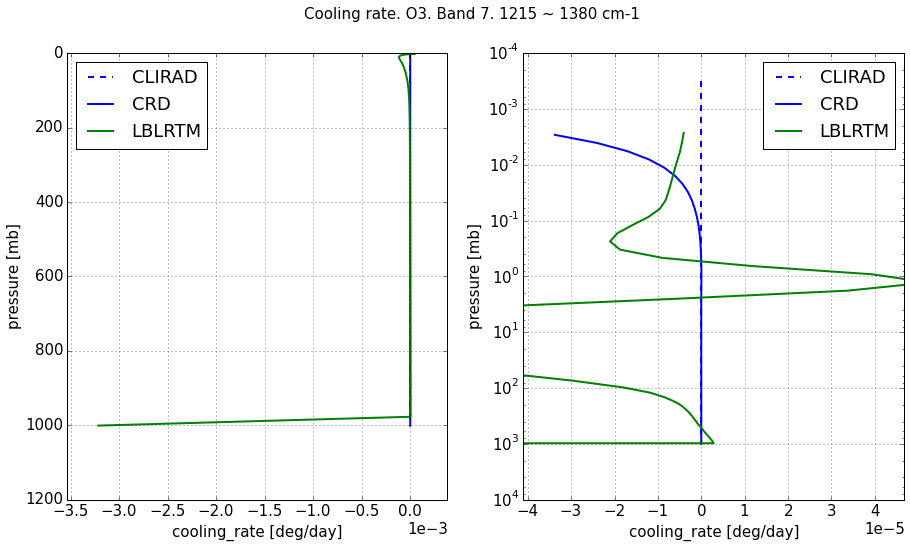


------------------------------------------------------------------------

CLIRAD-LW Spectral band 8. 1380 ~ 1900 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.88056  1.657780e-07 -30.880560 -1.230132e-06
30   299.800000 -30.88056  4.821160e-07 -30.880560 -1.326435e-09
0   1013.000000 -30.88056  3.055093e-06 -30.880557  1.175503e-08

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.729595  0.000000e+00 -30.729595  0.000000e+00
30   299.800000 -30.729595  4.106866e-08 -30.729595 -1.499367e-09
0   1013.000000 -30.729595  1.496447e-07 -30.729595  2.124841e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.640443   0.000000 -30.640443      0.000000
30   299.8000 -30.680089   0.003981 -30.676109     -0.000104
0   1013.0000 -30.697533   0.006264 -30.691269     -0.005225

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.1

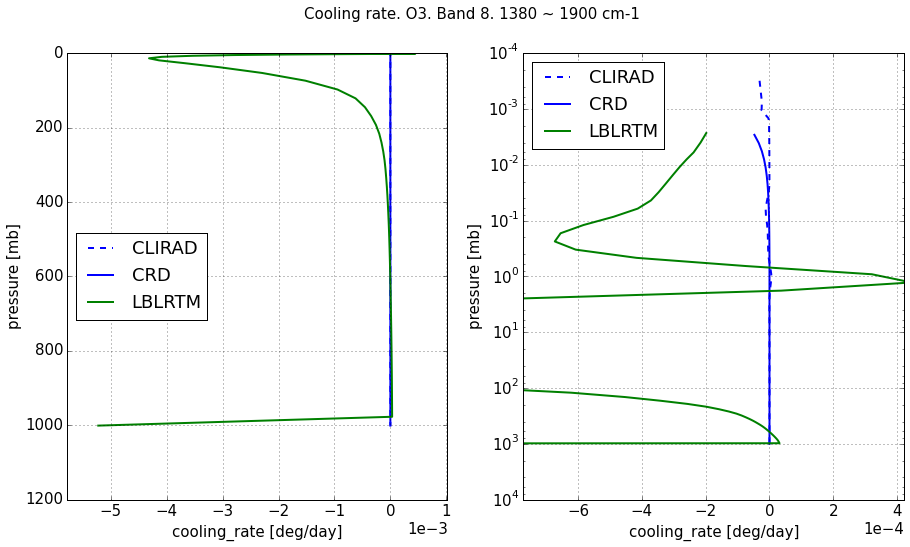


------------------------------------------------------------------------

CLIRAD-LW Spectral band 9. 1900 ~ 3000 cm-1

CLIRAD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -6.674498          0 -6.674498            -0
30   299.800000 -6.674498          0 -6.674498            -0
0   1013.000000 -6.674498          0 -6.674498            -0

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -6.625445  0.000000e+00 -6.625445  0.000000e+00
30   299.800000 -6.625445  5.418739e-09 -6.625445 -3.942476e-10
0   1013.000000 -6.625445  2.564721e-08 -6.625445  4.544859e-10

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -6.405988   0.000000 -6.405988      0.000000
30   299.8000 -6.536228   0.006685 -6.529543     -0.000591
0   1013.0000 -6.614782   0.016728 -6.598054     -0.022461

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.049053  0.000000e+00 -0.049053 -0

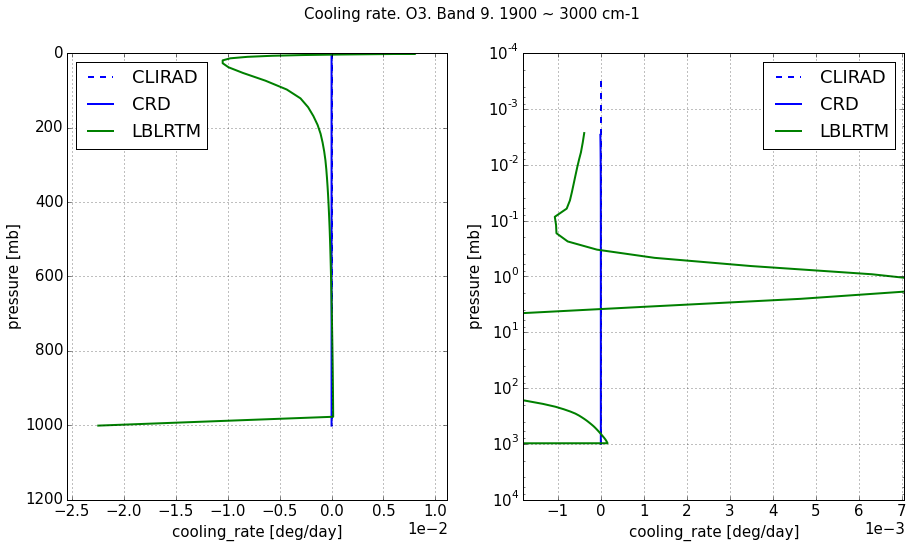


------------------------------------------------------------------------

CLIRAD-LW Spectral band 10. 540 ~ 620 cm-1

CLIRAD
       pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.002417       -0          0         0            -0
30   299.800000       -0          0         0            -0
0   1013.000000       -0          0         0            -0

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -36.23542  0.000000e+00 -36.23542  0.000000e+00
30   299.800000 -36.23542  1.339173e-07 -36.23542 -7.753076e-11
0   1013.000000 -36.23542  3.059209e-07 -36.23542  2.538879e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -36.212558   0.000000 -36.212558      0.000000
30   299.8000 -36.223754   0.008035 -36.215719     -0.000004
0   1013.0000 -36.231410   0.010693 -36.220717     -0.002380

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  36.23542  0.000000e+00  36.23542

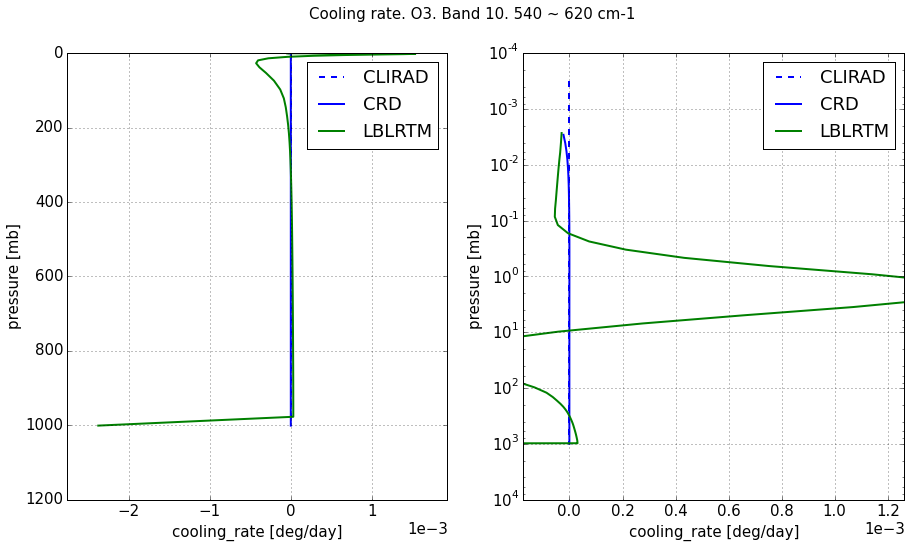


------------------------------------------------------------------------



In [18]:
print('Flux tables and cooling rates in CLIRAD spectral bands')
print()
print()

scripts_intermodel.lw_results_by_cliard_bands(
    infos_clirad=[('CLIRAD', 'b', '--', pnl_clirad)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd),
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [19]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

In [20]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')